# Comparing night lights in Peru 2003 vs 2016

Night Lights 2016 Tile B2: https://earthobservatory.nasa.gov/Features/NightLights/page3.php

City Lights 2003: https://visibleearth.nasa.gov/view.php?id=36008

# Import libraries

In [21]:
# Raster I/O and math
import rasterio
from rasterio.warp import calculate_default_transform
from rasterstats import zonal_stats

# Image processing
import numpy as np
from skimage import exposure
from cv2 import GaussianBlur

# Visualization
import matplotlib.pyplot as plt

%matplotlib inline

# Download Night Lights 2016

Download the grayscale image Tile B2, which contains Peru.

In [25]:
%%bash
mkdir peru
cd peru
wget https://www.nasa.gov/specials/blackmarble/2016/tiles/georeferrenced/BlackMarble_2016_B2_geo_gray.tif

mkdir: peru: File exists
--2018-04-11 15:52:16--  https://www.nasa.gov/specials/blackmarble/2016/tiles/georeferrenced/BlackMarble_2016_B2_geo_gray.tif
Resolving www.nasa.gov... 2607:f4e8:200:a000::e, 69.28.184.84
Connecting to www.nasa.gov|2607:f4e8:200:a000::e|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20723618 (20M) [image/tiff]
Saving to: ‘BlackMarble_2016_B2_geo_gray.tif’

     0K .......... .......... .......... .......... ..........  0%  564K 36s
    50K .......... .......... .......... .......... ..........  0%  695K 32s
   100K .......... .......... .......... .......... ..........  0% 1.62M 26s
   150K .......... .......... .......... .......... ..........  0% 1.00M 24s
   200K .......... .......... .......... .......... ..........  1% 2.56M 21s
   250K .......... .......... .......... .......... ..........  1% 1.65M 19s
   300K .......... .......... .......... .......... ..........  1% 2.89M 17s
   350K .......... .......... .......... .........

In [28]:
with rasterio.open("peru/BlackMarble_2016_B2_geo_gray.tif") as src:
        
        # The profile contains the metadata
        BlackMarble_2016_B2_metadata = src.profile
        
        # Read the first band into a numpy array
        BlackMarble_2016_B2 = src.read()

In [127]:
#BlackMarble_2016_B2?

In [30]:
BlackMarble_2016_B2_metadata

{'affine': Affine(0.004166666666666667, 0.0, -90.0,
       0.0, -0.004166666666666667, 0.0),
 'compress': 'lzw',
 'count': 3,
 'crs': CRS({'init': 'epsg:32662'}),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 21600,
 'interleave': 'pixel',
 'nodata': None,
 'tiled': False,
 'transform': (-90.0,
  0.004166666666666667,
  0.0,
  0.0,
  0.0,
  -0.004166666666666667),
 'width': 21600}

# Download Night Lights 2003

In [2]:
%%bash
cd peru
wget https://eoimages.gsfc.nasa.gov/images/imagerecords/36000/36008/lights_2003_1km.tif

mkdir: peru: File exists
--2018-04-11 15:40:48--  https://eoimages.gsfc.nasa.gov/images/imagerecords/36000/36008/lights_2003_1km.tif
Resolving eoimages.gsfc.nasa.gov... 128.183.160.186
Connecting to eoimages.gsfc.nasa.gov|128.183.160.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188318548 (180M) [image/tiff]
Saving to: ‘lights_2003_1km.tif’

     0K .......... .......... .......... .......... ..........  0%  131K 23m26s
    50K .......... .......... .......... .......... ..........  0%  172K 20m37s
   100K .......... .......... .......... .......... ..........  0%  270K 17m32s
   150K .......... .......... .......... .......... ..........  0%  237K 16m22s
   200K .......... .......... .......... .......... ..........  0%  614K 14m5s
   250K .......... .......... .......... .......... ..........  0%  469K 12m50s
   300K .......... .......... .......... .......... ..........  0%  450K 11m58s
   350K .......... .......... .......... .......... ..........  0

In [148]:
with rasterio.open("peru/lights_2003_1km.tif") as src:
        
        # The profile contains the metadata
        BlackMarble_2003_metadata = src.profile
        
        # Read the first band into a numpy array
        BlackMarble_2003 = src.read(1)

/anaconda/envs/py36/lib/python3.6/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


In [149]:
BlackMarble_2003_metadata

{'affine': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0),
 'compress': 'lzw',
 'count': 3,
 'crs': CRS({}),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 21600,
 'interleave': 'pixel',
 'nodata': None,
 'tiled': False,
 'transform': (0.0, 1.0, 0.0, 0.0, 0.0, 1.0),
 'width': 43200}

In [150]:
BlackMarble_2003_metadata['count'] = 1

# Get Peru Country Border

In [4]:
%%bash
cd peru
wget http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip
unzip ne_10m_admin_0_countries.zip

Archive:  ne_10m_admin_0_countries.zip
  inflating: ne_10m_admin_0_countries.README.html  
 extracting: ne_10m_admin_0_countries.VERSION.txt  
 extracting: ne_10m_admin_0_countries.cpg  
  inflating: ne_10m_admin_0_countries.dbf  
  inflating: ne_10m_admin_0_countries.prj  
  inflating: ne_10m_admin_0_countries.shp  
  inflating: ne_10m_admin_0_countries.shx  


--2018-04-11 15:42:49--  http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip
Resolving www.naturalearthdata.com... 66.147.242.194
Connecting to www.naturalearthdata.com|66.147.242.194|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: http://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip [following]
--2018-04-11 15:42:50--  http://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip
Resolving naciscdn.org... 146.201.97.163
Connecting to naciscdn.org|146.201.97.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5368691 (5.1M) [application/x-zip-compressed]
Saving to: ‘ne_10m_admin_0_countries.zip’

     0K .......... .......... .......... .......... ..........  0% 57.6K 90s
    50K .......... .......... .......... .......... ..........  1%  166K 60s
   100K .......... .......... .......... .......... ..........  2%  312K 45s
 

In [15]:
import geopandas as gpd
%matplotlib inline

In [16]:
gdf = gpd.read_file("peru/ne_10m_admin_0_countries.shp")

In [17]:
peru = gdf[gdf['ADMIN'] == 'Peru']

In [18]:
peru.head()

,scalerank,featurecla,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,geometry
177,0,Admin-0 country,2.0,Peru,PER,0.0,2.0,Sovereign country,Peru,PER,...,Latin America & Caribbean,4.0,4.0,4.0,-99.0,1.0,0.0,2.0,7.0,(POLYGON ((-76.17565995399988 -14.288374846999...


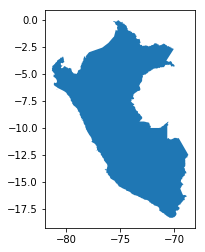

In [20]:
peru.plot();

In [36]:
peru.to_file("peru/peru")

In [35]:
peru.crs

{'init': 'epsg:4326'}

# Clip 2016 Night Lights to Peru

We'll make one version clipped to Peru's border and another clipped to Peru's bounding box.

In [43]:
BlackMarble_2016_B2_clipped_to_peru = zonal_stats(
                                        peru,
                                        "peru/BlackMarble_2016_B2_geo_gray.tif",
                                        all_touched=True,
                                        raster_out=True)[0]

/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/main.py:145: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  with Raster(raster, affine, nodata, band) as rast:
/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/io.py:242: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  self.affine = guard_transform(self.src.transform)
/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/io.py:294: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/main.py:165: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  np.issubdtype(fsrc.array.dtype, float)


In [44]:
BlackMarble_2016_B2_clipped_to_peru_bbox = zonal_stats(
                                            peru.envelope,
                                            "peru/BlackMarble_2016_B2_geo_gray.tif",
                                            all_touched=True,
                                            raster_out=True)[0]

/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/main.py:145: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  with Raster(raster, affine, nodata, band) as rast:
/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/io.py:242: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  self.affine = guard_transform(self.src.transform)
/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/io.py:294: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/main.py:165: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  np.issubdtype(fsrc.array.dtype, float)


Black Marble 2016 clipped to Peru.

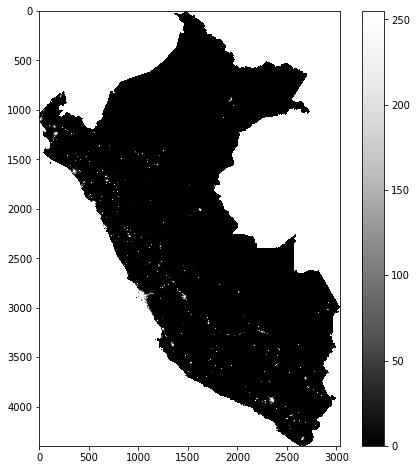

In [169]:
plt.figure(figsize = (8,8))
plt.imshow(BlackMarble_2016_B2_clipped_to_peru['mini_raster_array'], cmap='Greys_r')
plt.colorbar()
plt.show()

Black Marble 2016 clipped to Peru's bounding box.

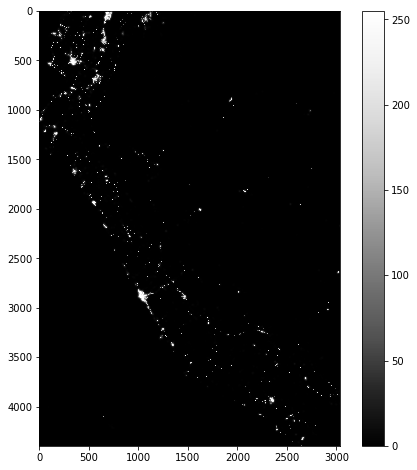

In [46]:
plt.figure(figsize = (8,8))
plt.imshow(BlackMarble_2016_B2_clipped_to_peru_bbox['mini_raster_array'], cmap='Greys_r')
plt.colorbar()
plt.show()

In [67]:
BlackMarble_2016_B2_clipped_to_peru_bbox['mini_raster_array'][0].max()

255

# Clip 2003 Night Lights to Peru

Again, we'll make one version clipped to Peru's border and another clipped to Peru's bounding box.

In [119]:
#from PIL import Image
#BlackMarble_2003_gray = Image.fromarray(BlackMarble_2003).convert('L')
#BlackMarble_2003_gray = np.array(BlackMarble_2003_gray)

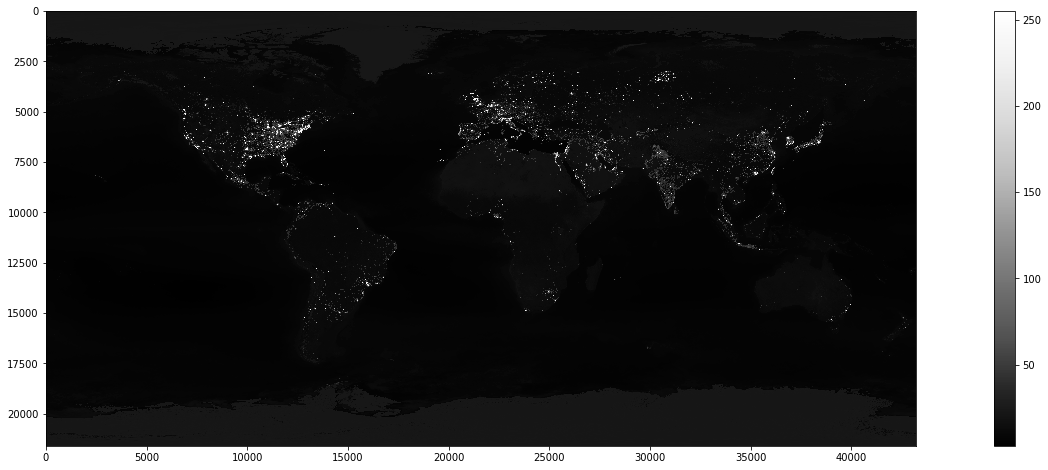

In [151]:
plt.figure(figsize = (28,8))
plt.imshow(BlackMarble_2003, cmap='Greys_r')
plt.colorbar()
plt.show()

In [165]:
BlackMarble_2003.shape

(21600, 43200)

In [162]:
BlackMarble_2003_metadata

{'affine': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0),
 'compress': 'lzw',
 'count': 1,
 'crs': CRS({}),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 21600,
 'interleave': 'pixel',
 'nodata': None,
 'tiled': False,
 'transform': (0.0, 1.0, 0.0, 0.0, 0.0, 1.0),
 'width': 43200}

In [167]:
with rasterio.open("lights_2003_1km_test.tif", "w", **BlackMarble_2003_metadata) as dst:
    dst.write(BlackMarble_2003)

ValueError: Source shape is inconsistent with given indexes

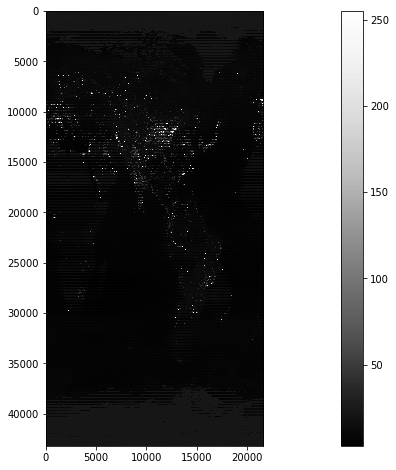

In [166]:
plt.figure(figsize = (28,8))
plt.imshow(BlackMarble_2003_reshaped, cmap='Greys_r')
plt.colorbar()
plt.show()

In [ ]:
BlackMarble_2003_reshaped.S

In [140]:
# Write to tif, using the same profile as the source
with rasterio.open("lights_2003_1km_gray.tif", 'w', **BlackMarble_2003_gray_metadata) as dst:
    dst.write(BlackMarble_2003_gray)

ValueError: Source shape is inconsistent with given indexes

In [50]:
BlackMarble_2003_clipped_to_peru = zonal_stats(
                                        peru,
                                        "peru/lights_2003_1km.tif",
                                        all_touched=True)

/anaconda/envs/py36/lib/python3.6/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()
/anaconda/envs/py36/lib/python3.6/site-packages/rasterstats/main.py:145: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  with Raster(raster, affine, nodata, band) as rast:


ZeroDivisionError: float division by zero